In [1]:
# run this to shorten the data import from the files
import os
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [2]:
# exercise 01

"""
Towards grid approximation

Congratulations! You have just been hired as a data analyst at your government's Department of Health. The cabinet is considering the purchase of a brand-new drug against a deadly and contagious virus. There are some doubts, however, regarding how effective the new drug is against the virus. You have been tasked with estimating the drug's efficacy rate, i.e. the percentage of patients cured by the drug.

An experiment was quickly set up in which 10 sick patients have been treated with the drug. Once you know how many of them are cured, you can use the binomial distribution with a cured patient being a "success" and the efficacy rate being the "probability of success". While you are waiting for the experiment's results, you decide to prepare the parameter grid.

numpy and pandas have been imported for you as np and pd, respectively.
"""

# Instructions

"""

    Using np.arange(), create an array of all possible numbers of patients cured (from 0 to 10) and assign it to num_patients_cured.
    Using np.arange(), create an array of all possible values for the efficacy rate (from 0 to 1, by 0.01) and assign it to efficacy_rate.
    Combine num_patients_cured and efficacy_rate into a DataFrame called df, listing all possible combinations of the two.
    Assign ["num_patients_cured", "efficacy_rate"] to df's columns and print it.

"""

# solution
import numpy as np
import pandas as pd
# Create cured patients array from 1 to 10
num_patients_cured = np.arange(0,11,1)

# Create efficacy rate array from 0 to 1 by 0.01
efficacy_rate = np.arange(0,1.01,0.01)

# Combine the two arrays in one DataFrame
df = pd.DataFrame([(x, y) for x in num_patients_cured for y in efficacy_rate])

# Name the columns
df.columns = ['num_patients_cured', 'efficacy_rate']

# Print df
print(df)

#----------------------------------#

# Conclusion

"""
Well done! You have prepared a fine grid of possible values for the parameter you want to estimate (the efficacy rate), for all possible results of the experiment (the number of patients cured by the drug). Uh-oh, it looks like the results have just arrived! Let's make use of them in the next exercise!
"""

      num_patients_cured  efficacy_rate
0                      0           0.00
1                      0           0.01
2                      0           0.02
3                      0           0.03
4                      0           0.04
...                  ...            ...
1106                  10           0.96
1107                  10           0.97
1108                  10           0.98
1109                  10           0.99
1110                  10           1.00

[1111 rows x 2 columns]


"\nWell done! You have prepared a fine grid of possible values for the parameter you want to estimate (the efficacy rate), for all possible results of the experiment (the number of patients cured by the drug). Uh-oh, it looks like the results have just arrived! Let's make use of them in the next exercise!\n"

/tmp/ipykernel_133594/1756305808.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()


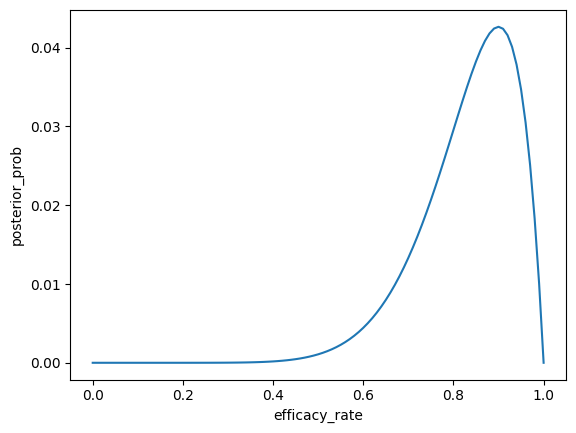

'\nGood job! As we might have expected, observing 9 out of 10 patients cured results in the posterior efficacy rate of 90% being very likely. Notice, however, how much uncertainty there is in the posterior distribution: even the efficacy of 50% is plausible. This is the result of a very small data sample and a great example of how Bayesian parameter estimates incorporate uncertainty!\n'

In [4]:
# exercise 02

"""
Grid approximation without prior knowledge

According to the experiment's outcomes, out of 10 sick patients treated with the drug, 9 have been cured. What can you say about the drug's efficacy rate based on such a small sample? Assume you have no prior knowledge whatsoever regarding how good the drug is.

A DataFrame df with all possible combinations of the number of patients cured and the efficacy rate which you created in the previous exercise is available in the workspace.

uniform and binom have been imported for you from scipy.stats. Also, pandas and seaborn are imported as pd and sns, respectively.
"""

# Instructions

"""

    Calculate a uniform prior for efficacy_rate using uniform.pdf() and assign it as a new column to df.
    Calculate the binomial likelihood using binom.pmf() by passing the number of "successes", the total number of observations, and the "probability of success", and assign the result as a new column to df.
---

    Calculate the posterior probability for efficacy rate, assign it to a new column called posterior_prob in df, and scale it so that it sums up to 1.
---

    Filter df to keep only rows where the number of patients cured is 9, assign the result to df_9_of_10_cured, and scale the posterior_prob so that it sums up to 1.
---

    Plot the drug's posterior efficacy rate having seen 9 out of 10 patients cured.

"""

# solution
from scipy.stats import uniform, binom
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the prior efficacy rate and the likelihood
df["prior"] = uniform.pdf(df["efficacy_rate"])
df["likelihood"] = binom.pmf(df["num_patients_cured"], 10, df["efficacy_rate"])

# Calculate the posterior efficacy rate and scale it to sum up to one
df["posterior_prob"] = df["prior"] * df["likelihood"]
df["posterior_prob"] /= df["posterior_prob"].sum()

# Compute the posterior probability of observing 9 cured patients
df_9_of_10_cured = df.loc[df["num_patients_cured"] == 9]
df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured["posterior_prob"].sum()

# Plot the drug's posterior efficacy rate
sns.lineplot(x=df_9_of_10_cured['efficacy_rate'], y=df_9_of_10_cured['posterior_prob'])
plt.show()

#----------------------------------#

# Conclusion

"""
Good job! As we might have expected, observing 9 out of 10 patients cured results in the posterior efficacy rate of 90% being very likely. Notice, however, how much uncertainty there is in the posterior distribution: even the efficacy of 50% is plausible. This is the result of a very small data sample and a great example of how Bayesian parameter estimates incorporate uncertainty!
"""

/tmp/ipykernel_133594/2432910575.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured["new_posterior_prob"].sum()


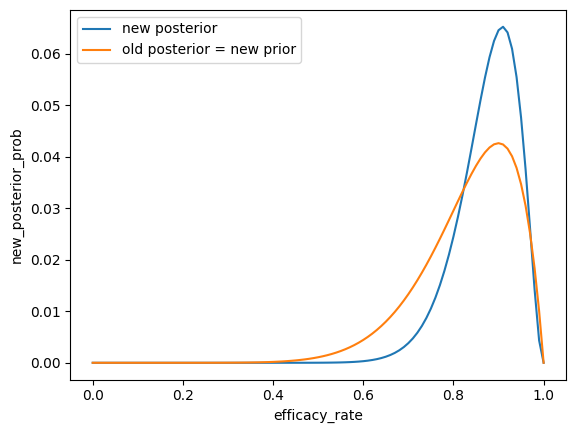

"\nYes, this one's false! The difference between these two distributions actually reflects what we have learned only from the data on the 12 new patients. The knowledge about the first 10 patients is already encoded in the old posterior, which became the new prior.\n\nInstead of using the old posterior as a new prior, we could have come up with our own prior belief about the efficacy rate in the first place. Let's take a look at it in the upcoming video!\n"

In [6]:
# exercise 03

"""
Updating posterior belief

Well done on estimating the posterior distribution of the efficacy rate in the previous exercise! Unfortunately, due to a small data sample, this distribution is quite wide, indicating much uncertainty regarding the drug's quality. Luckily, testing of the drug continues, and a group of another 12 sick patients have been treated, 10 of whom were cured. We need to update our posterior distribution with these new data!

This is easy to do with the Bayesian approach. We simply need to run the grid approximation similarly as before, but with a different prior. We can use all our knowledge about the efficacy rate (embodied by the posterior distribution from the previous exercise) as a new prior! Then, we recompute the likelihood for the new data, and get the new posterior!

The DataFrame you created in the previous exercise, df, is available in the workspace and binom has been imported for you from scipy.stats.
"""

# Instructions

"""

    Assign posterior_prob from df to a new column called new_prior.
    Calculate the new_likelihood using binom.pmf() based on the new data and assign it as a new column to df.
---

    Calculate the new_posterior_prob using new_prior and new_likelihood, assign it as a new column to df, and scale it by its sum.
---

    Filter df to keep only rows with 10 cured patients, assign the result to df_10_of_12_cured, and scale the new_posterior_prob so that it sums up to 1.
---
Question

We have two posterior distributions for the efficacy rate now:

    The one from the previous exercise (without prior knowledge, after seeing 9 out of 10 patients cured) which you have used as a new prior in this exercise.
    The updated one you have just calculated (after seeing another 10 out of 12 patients cured).

You can plot them on top of each other using the following code chunk:

sns.lineplot(df_10_of_12_cured["efficacy_rate"], 
             df_10_of_12_cured["new_posterior_prob"], 
             label="new posterior")
sns.lineplot(df_9_of_10_cured["efficacy_rate"], 
             df_9_of_10_cured["posterior_prob"], 
             label="old posterior = new prior")
plt.show()

Based on the plot, which of the following statements is false?

[The difference between these two distributions reflects what we have learned from the data on all patients: the first 10, and the next 12.] Answer
"""

# solution

# Assign old posterior to new prior and calculate likelihood
df["new_prior"] = df["posterior_prob"]
df["new_likelihood"] = binom.pmf(df["num_patients_cured"], 12, df["efficacy_rate"])

# Calculate new posterior and scale it
df["new_posterior_prob"] = df["new_prior"] * df["new_likelihood"]
df["new_posterior_prob"] /= df["new_posterior_prob"].sum()

# Compute the posterior probability of observing 10 cured patients
df_10_of_12_cured = df[df['num_patients_cured'] == 10]
df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured["new_posterior_prob"].sum()

#----------------------------------#

sns.lineplot(x=df_10_of_12_cured["efficacy_rate"], 
             y=df_10_of_12_cured["new_posterior_prob"], 
             label="new posterior")
sns.lineplot(x=df_9_of_10_cured["efficacy_rate"], 
             y=df_9_of_10_cured["posterior_prob"], 
             label="old posterior = new prior")
plt.show()

# Conclusion

"""
Yes, this one's false! The difference between these two distributions actually reflects what we have learned only from the data on the 12 new patients. The knowledge about the first 10 patients is already encoded in the old posterior, which became the new prior.

Instead of using the old posterior as a new prior, we could have come up with our own prior belief about the efficacy rate in the first place. Let's take a look at it in the upcoming video!
"""

"\nCorrect! Beta(5, 2) seems to be a good prior: it captures the external information about our parameter of interest and is based on previous scientific research. Let's use it in your analysis!\n"

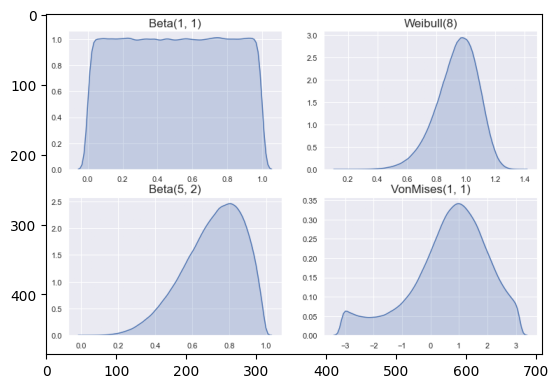

In [11]:
# exercise 04

"""
Picking the right prior

You continue working on your task to estimate the new drug's efficacy, but with the small data sample you had, you know there is a lot of uncertainty in your estimate. Luckily, a couple of neighboring countries managed to conduct more extensive experiments and have just published their results. You can use them as priors in your analysis!

Having browsed all the publications, you conclude that the reported efficacy rates are mostly between 70% and 90%. A couple of results below 50% were recorded too, but not many.

Which of the following distributions captures this prior information best?


"""

# Instructions

"""
Beta(1, 1)


Weibull(8)


Beta(5, 2)(Answer)


VonMises(1, 1)

"""

# solution

# Code to show image
from matplotlib import image

img = image.imread('/home/nero/Documents/Estudos/DataCamp/Python/courses/Bayesian_Data_Analysis_in_Python/4priors.png')
plt.imshow(img)
#----------------------------------#

# Conclusion

"""
Correct! Beta(5, 2) seems to be a good prior: it captures the external information about our parameter of interest and is based on previous scientific research. Let's use it in your analysis!
"""

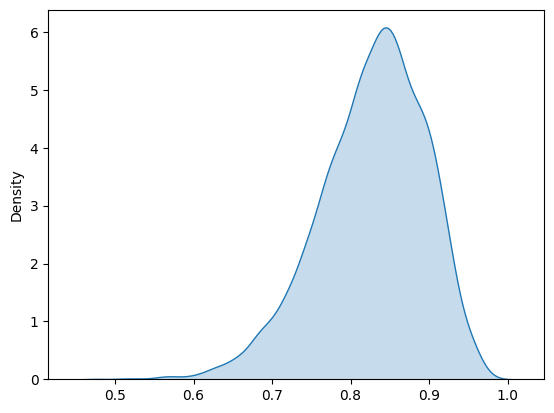

"\nWell done! Notice that the posterior distribuion has a slightly longer tail on the left-hand side, allowing for efficacy rates as small as 50%, even though in your data you observe 86% (19 out of 22). This is the impact of the prior: you learn not only from your own small data, but also from other countries' experience! Now that you know how obtain posterior distributions of the parameters, let's talk about how to report these results!\n"

In [15]:
# exercise 05

"""
Simulating posterior draws

You have just decided to use a Beta(5, 2) prior for the efficacy rate. You are also using the binomial distribution to model the data (curing a sick patient is a "success", remember?). Since the beta distribution is a conjugate prior for the binomial likelihood, you can simply simulate the posterior!

You know that if the prior is Beta(a,b), then the posterior is Beta(x,y), with:

x = Number_Of_Successes + a,
y = NUmber_Of_Observations - NUmber_Of_Successes + b.

Can you simulate the posterior distribution? Recall that altogether you have data on 22 patients, 19 of whom have been cured. numpy and seaborn have been imported for you as np and sns, respectively.
"""

# Instructions

"""

    Assign the numbers of patients treated and cured to num_patients_treated and num_patients_cured, respectively.
    Use the appropriate numpy function to sample from the posterior distribution and assign the result to posterior_draws.
    Plot the posterior distribution using the appropriate seaborn function.

"""

# solution

# Define the number of patients treated and cured
num_patients_treated = 22
num_patients_cured = 19

# Simulate 10000 draws from the posterior distribuition
posterior_draws = np.random.beta(5 + num_patients_cured, num_patients_treated - num_patients_cured + 2, 10000)

# Plot the posterior distribution
sns.kdeplot(posterior_draws, fill=True)
plt.show()

#----------------------------------#

# Conclusion

"""
Well done! Notice that the posterior distribuion has a slightly longer tail on the left-hand side, allowing for efficacy rates as small as 50%, even though in your data you observe 86% (19 out of 22). This is the impact of the prior: you learn not only from your own small data, but also from other countries' experience! Now that you know how obtain posterior distributions of the parameters, let's talk about how to report these results!
"""

In [16]:
# exercise 06

"""
Point estimates

You continue working at your government's Department of Health. You have been tasked with filling the following memo with numbers, before it is sent to the secretary.

    Based on the experiments carried out by ourselves and neighboring countries, should we distribute the drug, we can expect ___ infected people to be cured. There is a 50% probability the number of cured infections will amount to at least ___, and with 90% probability it will not be less than ___.

The array of posterior draws of the drug's efficacy rate you have estimated before is available to you as drug_efficacy_posterior_draws.

Calculate the three numbers needed to fill in the memo, knowing there are 100,000 infections at the moment. numpy has been imported for you as np.
"""

# Instructions

"""

    Calculate the expected number of cured infections by multiplying the drug's expected efficacy rate (drug_efficacy_posterior_draws) by the number of infected people (100,000) and assign the result to cured_expected.
---

    Calculate the minimum number of infections that will be cured with 50% probability and assign it to min_cured_50_perc.
---

    Calculate the minimum number of infections that will be cured with 90% probability and assign it to min_cured_90_perc.

"""

# solution
drug_efficacy_posterior_draws = np.genfromtxt(path_data+'drug_efficacy_posterior_draws.csv', delimiter=',')
# Calculate the expected number of people cured
cured_expected = np.mean(drug_efficacy_posterior_draws) * 100_000

# Calculate the minimum number of people cured with 50% probability
min_cured_50_perc = np.median(drug_efficacy_posterior_draws) * 100_000

# Calculate the minimum number of people cured with 90% probability
min_cured_90_perc = np.percentile(drug_efficacy_posterior_draws, 10) * 100000

# Print the filled-in memo
print(f"Based on the experiments carried out by ourselves and neighboring countries, \nshould we distribute the drug, we can expect {int(cured_expected)} infected people to be cured. \nThere is a 50% probability the number of cured infections \nwill amount to at least {int(min_cured_50_perc)}, and with 90% probability \nit will not be less than {int(min_cured_90_perc)}.")

#----------------------------------#

# Conclusion

"""
Great! Your memo compresses the posterior distribution of the drug's efficacy to a couple of useful numbers, certainly helping the secretary decide whether to buy the new drug. However, these numbers convey no information as to how uncertain the estimation is. Let's try quantifying this uncertainty next!
"""

Based on the experiments carried out by ourselves and neighboring countries, 
should we distribute the drug, we can expect 82769 infected people to be cured. 
There is a 50% probability the number of cured infections 
will amount to at least 83484, and with 90% probability 
it will not be less than 73481.


"\nGreat! Your memo compresses the posterior distribution of the drug's efficacy to a couple of useful numbers, certainly helping the secretary decide whether to buy the new drug. However, these numbers convey no information as to how uncertain the estimation is. Let's try quantifying this uncertainty next!\n"

In [18]:
# exercise 07

"""
Highest Posterior Density credible intervals

You know that reporting bare point estimates is not enough. It would be great to provide a measure of uncertainty in the drug's efficacy rate estimate, and you have all the means to do so. You decide to add the following to the memo.

    The experimental results indicate that with a 90% probability the new drug's efficacy rate is between ___ and ___, and with a 95% probability it is between ___ and ___.

You will need to calculate two credible intervals: one of 90% and another of 95% probability. The drug_efficacy_posterior_draws array is still available in your workspace.
"""

# Instructions

"""

    Import the arviz package as az.
    Calculate the Highest Posterior Density credible interval of 90% and assign it to ci_90.
    Calculate the Highest Posterior Density credible interval of 95% and assign it to ci_95.

"""

# solution

# Import arviz as az
import arviz as az

# Calculate HPD credible interval of 90%
ci_90 = az.hdi(drug_efficacy_posterior_draws, hdi_prob=0.9)

# Calculate HPD credible interval of 95%
ci_95 = az.hdi(drug_efficacy_posterior_draws, hdi_prob=0.95)

# Print the memo
print(f"The experimental results indicate that with a 90% probability \nthe new drug's efficacy rate is between {np.round(ci_90[0], 2)} and {np.round(ci_90[1], 2)}, \nand with a 95% probability it is between {np.round(ci_95[0], 2)} and {np.round(ci_95[1], 2)}.")

#----------------------------------#

# Conclusion

"""
Great work!
"""

The experimental results indicate that with a 90% probability 
the new drug's efficacy rate is between 0.72 and 0.94, 
and with a 95% probability it is between 0.7 and 0.95.


'\nGreat work!\n'

In [19]:
# exercise 08

"""
The meaning of credibility

Well done on calculating the Highest Posterior Density credible interval in the last exercise! Here is the 90% interval you have obtained:

    (0.72, 0.94)

What is the proper Bayesian interpretation of this credible interval in the context of the drug's efficacy?

There is one correct answer. The other two answers provide two equivalent but differently phrased frequentist interpretations of a confidence interval.
"""

# Instructions

"""
There is a 90% probability that the interval (0.72, 0.94) contains the drug's true efficacy rate.


The probability that the drug's true efficacy rate lies in the interval (0.72, 0.94) is 90%.(Answer)


If you had the resources to repeat the experiment many times, in 90% of the cases the interval (0.72, 0.94) would contain the drug's true efficacy rate.
"""

# solution



#----------------------------------#

# Conclusion

"""
Perfect, even though this was a hard one! That's the Bayesian interpretation of a credible interval. Since the drug's true efficacy rate is considered a random variable, we can make probabilistic statements about it, as in: "the probability that it takes a particular value or that it lies in a particular interval is X%". Great job on finishing Chapter 2. Next, in Chapter 3, you will apply all you've learned about the Bayesian approach to practical problems: A/B testing, decision analysis, and regression modeling. See you there!
"""

'\nPerfect, even though this was a hard one! That\'s the Bayesian interpretation of a credible interval. Since the drug\'s true efficacy rate is considered a random variable, we can make probabilistic statements about it, as in: "the probability that it takes a particular value or that it lies in a particular interval is X%". Great job on finishing Chapter 2. Next, in Chapter 3, you will apply all you\'ve learned about the Bayesian approach to practical problems: A/B testing, decision analysis, and regression modeling. See you there!\n'